# K-Nearest neighbour (KNN) 

## Model Complexity vs. Generalisation Error

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
# EDA
cancer['data']
cancer['target']
cancer['target_names']
cancer['DESCR']
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [5]:
print('Size of data set {}'.format(cancer['data'].shape))

Size of data set (569, 30)


In [6]:
# Split dataset into training and testing sets
trainX, testX, trainY, testY = train_test_split(cancer['data'],cancer['target'], stratify = cancer['target'], test_size = 0.25)

In [10]:
# Find optimal 'K' factor for high accuracy on unseen data
trainAccuracy = []
testAccuracy  = []
for k_neighbor in range(1,15):
    clf = KNeighborsClassifier(n_neighbors= k_neighbor)
    clf.fit(trainX,trainY)
    # record training set accuracy
    trainAccuracy.append(clf.score(trainX, trainY ))
    # record generalization accuracy
    testAccuracy.append(clf.score(testX, testY))

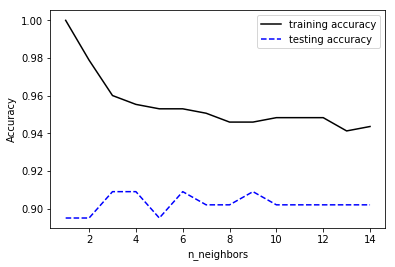

In [25]:
plt.plot(range(1,15), trainAccuracy, label = 'training accuracy', color = 'black')
plt.plot(range(1,15), testAccuracy, label = 'testing accuracy', linestyle='dashed', color = 'blue')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


In [ ]:
# Model Genaralisation is contant for higher n_neighbors (>=10).
# For n_neighbors = 1, training accuracy is ~100%, however, fails drastically on testing data.
# For n_neighbors = 1, model complexity is high
# For n_neighbors = 6, model is simple and testing accuracy is high.
# Model performs almost consistantly between n_neighbors = 6 and n_neighbors = 9.